<a href="https://colab.research.google.com/github/RoshanKumar854/ML-Projects/blob/main/Coursera_week_4_part_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf

In [48]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')


In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [51]:
from tensorflow.keras.preprocessing.image import load_img

car_img = load_img('/content/488ModelImage.jpg', target_size=(224,224))
tiger_img = load_img('/content/77ic6i4qdj_Medium_WW226365.jpg', target_size=(224,224))
girl_img = load_img('/content/photo-1529626455594-4ff0802cfb7e.jpg', target_size=(224, 224)) 

In [58]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
  X = img_to_array(img)[np.newaxis, ...]
  X = preprocess_input(X)
  preds = decode_predictions(model.predict(X), top=5)
  top_preds = pd.DataFrame(columns=['predictions', 'probability'],
                           index=np.arange(5)+1)
  for i in range(5):
    top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
    top_preds.loc[i+1, 'probability'] = preds[0][i][2]
  return top_preds  

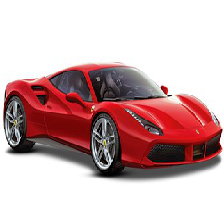

In [53]:
car_img

In [61]:
get_top_5_predictions(girl_img)

,predictions,probability,prediction
1,NaN,0.319998,jersey
2,NaN,0.135534,brassiere
3,NaN,0.0717073,sweatshirt
4,NaN,0.0421282,maillot
5,NaN,0.0405123,envelope


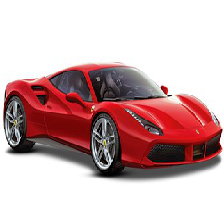

In [55]:
car_img